# GlassTypePrediction
Responsibility : Mariam Amr

## Imports

In [8]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# For implementing ensemble models
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Selection

In [9]:
df = pd.read_csv(
    "./AMLAss1Datasets/glasstypePrediction.csv"
)  # Suitable for classification

## Preprocessing
* Dataset has no nulls
* All columns will be used in our project
* Scaling the numerical features 
    ```python
    StandardScaler() #Scaling data to fit a standard normal distribution
    ```
* Removing outliers using `IQR` method

In [10]:
# Renaming the columns
df.columns = [
    "ri", "na", "mg", "al", "si", "k", "ca", "ba", "fe", "type"
]

In [11]:
# Scaling the numerical features
scaler = StandardScaler()
df[["ri", "na", "mg", "al", "si", "k", "ca", "ba", "fe"]] = scaler.fit_transform(
    df[["ri", "na", "mg", "al", "si", "k", "ca", "ba", "fe"]]
)

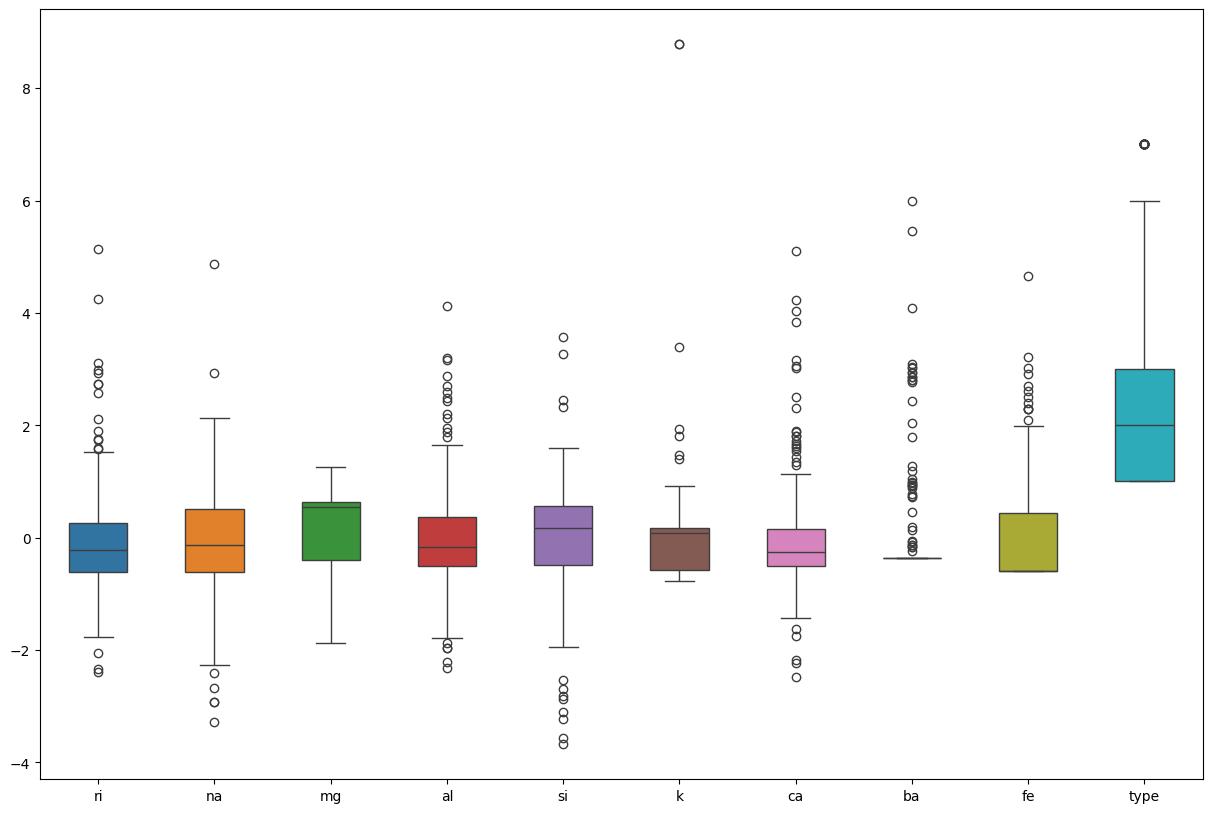

In [12]:
# Check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, width=0.5)
plt.show()

In [13]:
# Removing the outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
df.head()

,ri,na,mg,al,si,k,ca,ba,fe,type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1


## Model Implementation

References :
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html 

## Hyperparameter Turning

References:
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html